In [898]:
#importing python libraries for references
import pandas as pd
import numpy as np

In [998]:
#read data set into a dataframe
bikesharing_dataframe = pd.read_csv('day.csv')

In [999]:
bikesharing_dataframe.shape

(730, 16)

we have 730 records and 16 columns

In [1000]:
#now let's check for null & non-null values
bikesharing_dataframe.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

this implies we have no null values among all the rows and columns

In [1001]:
#now let's check for duplicate records
#to do this let's make a copy of dataframe for a while
copy_of_dataframe = bikesharing_dataframe.copy()

In [1002]:
#check for new copy_of_dataframe data it has
copy_of_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1003]:
copy_of_dataframe.shape

(730, 16)

In [1004]:
#drop duplicates is used to eliminate duplicate records
copy_of_dataframe.drop_duplicates(inplace=True)

In [1005]:
copy_of_dataframe.shape

(730, 16)

after dropping duplicates, no change in number of records, it is still 730 count
so I will keep using original dataframe i.e. bikesharing_dataframe

In [1006]:
#now let's remove columns which may not be useful for our analysis
#dropping instant column since it is just a unique number or index of the rows, so not at all helpful for analysis
bikesharing_dataframe.drop(['instant'],axis=1,inplace=True)

In [1007]:
#dropping dteday column since we already have month and year column separately and date alone if extracted doesn't help us for analysis
bikesharing_dataframe.drop(['dteday'],axis=1,inplace=True)

In [1008]:
#dropping casual and registered columns too since as per the definition of cnt=casual+registered, they separately don't help in analysis since date wise casual and registered numbers doesn't make sense to have and we assure there is certain amount of bookings done on specific date
bikesharing_dataframe.drop(['casual','registered'],axis=1,inplace=True)

In [1009]:
bikesharing_dataframe.shape

(730, 12)

since we dropped 4 columns we can now see there are 12 columns in dataframe

In [1010]:
#now let's map the coresponding values for numbers in the records as per their definition
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
bikesharing_dataframe['season'] = bikesharing_dataframe['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [1011]:
#yr : year (0: 2018, 1:2019)
bikesharing_dataframe['yr'] = bikesharing_dataframe['yr'].map({0:'2018', 1:'2019'})

In [1012]:
#mnth : month ( 1 to 12)
bikesharing_dataframe['mnth'] = bikesharing_dataframe['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April',5:'May', 6:'June', 7:'July', 8:'August',9:'September', 10:'October', 11:'November', 12:'December'})

In [1013]:
#weathersit : 
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bikesharing_dataframe['weathersit'] = bikesharing_dataframe['weathersit'].map({1:'Cloudy', 2:'Mist', 3:'Rain', 4:'Thunder'})

In [921]:
bikesharing_dataframe['weekday'] = bikesharing_dataframe['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thursday', 5:'Friday', 6:'Saturday'})

In [1014]:
bikesharing_dataframe.head()
bikesharing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


we now see that all the defined column values are having corresponding values

our target variable is cnt and other columns are independent variablesn so cnt always lies on y axis of graphs

In [1015]:
#data visualization 
#importing required libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='season', ylabel='cnt'>

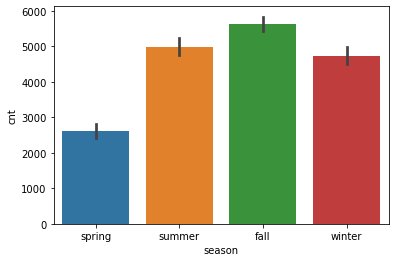

In [1016]:
#bar plot for seasons values vs count
sns.barplot(x='season',y='cnt',data=bikesharing_dataframe)

fall season has more number of rides taken with near count of summer and winter,spring season rides are comparatively lower.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

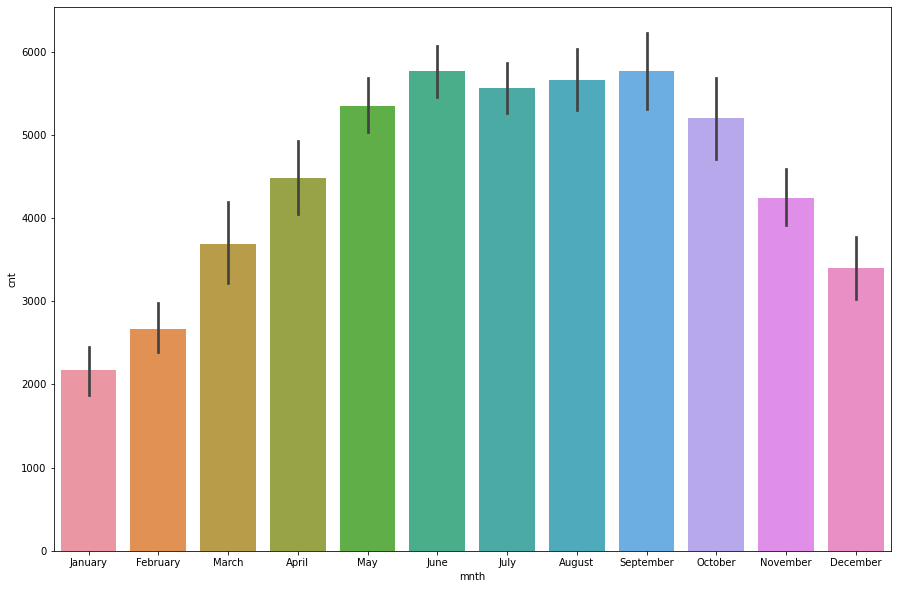

In [1017]:
#plot ride count versus month
plt.figure(figsize=(15,10))
sns.barplot(x='mnth',y='cnt',data=bikesharing_dataframe)

June to September demand was higher compared to other months

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

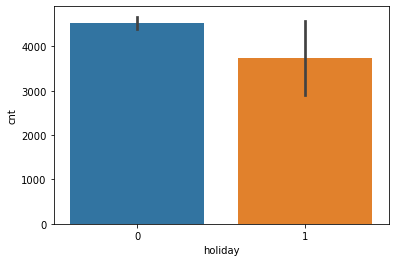

In [1018]:
#plot ride count versus 
sns.barplot(x='holiday',y='cnt',data=bikesharing_dataframe)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

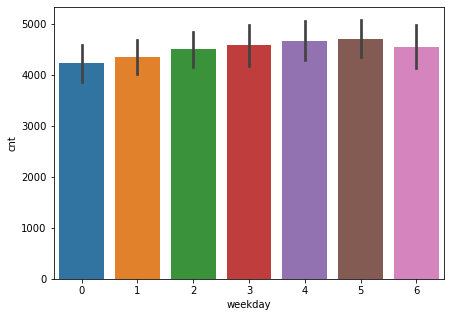

In [1019]:
#weekdays vs count of rides 
plt.figure(figsize=(7,5))
sns.barplot(x='weekday',y='cnt',data=bikesharing_dataframe)

there is not much difference observed in all the weekdays

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

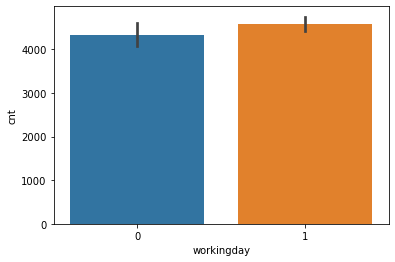

In [1020]:
#working day vs count plot
sns.barplot(x='workingday',y='cnt',data=bikesharing_dataframe)

not much difference is found between working day and non working day

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

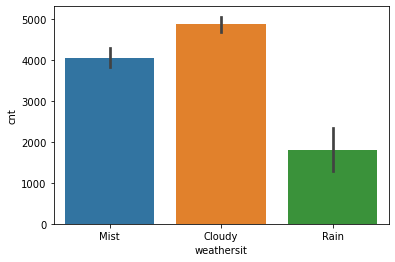

In [935]:
#plot to know the weather situation vs count
sns.barplot(x='weathersit',y='cnt',data=bikesharing_dataframe)

The plot says, Cloudy weather had more demand than Mist and Rain situations 

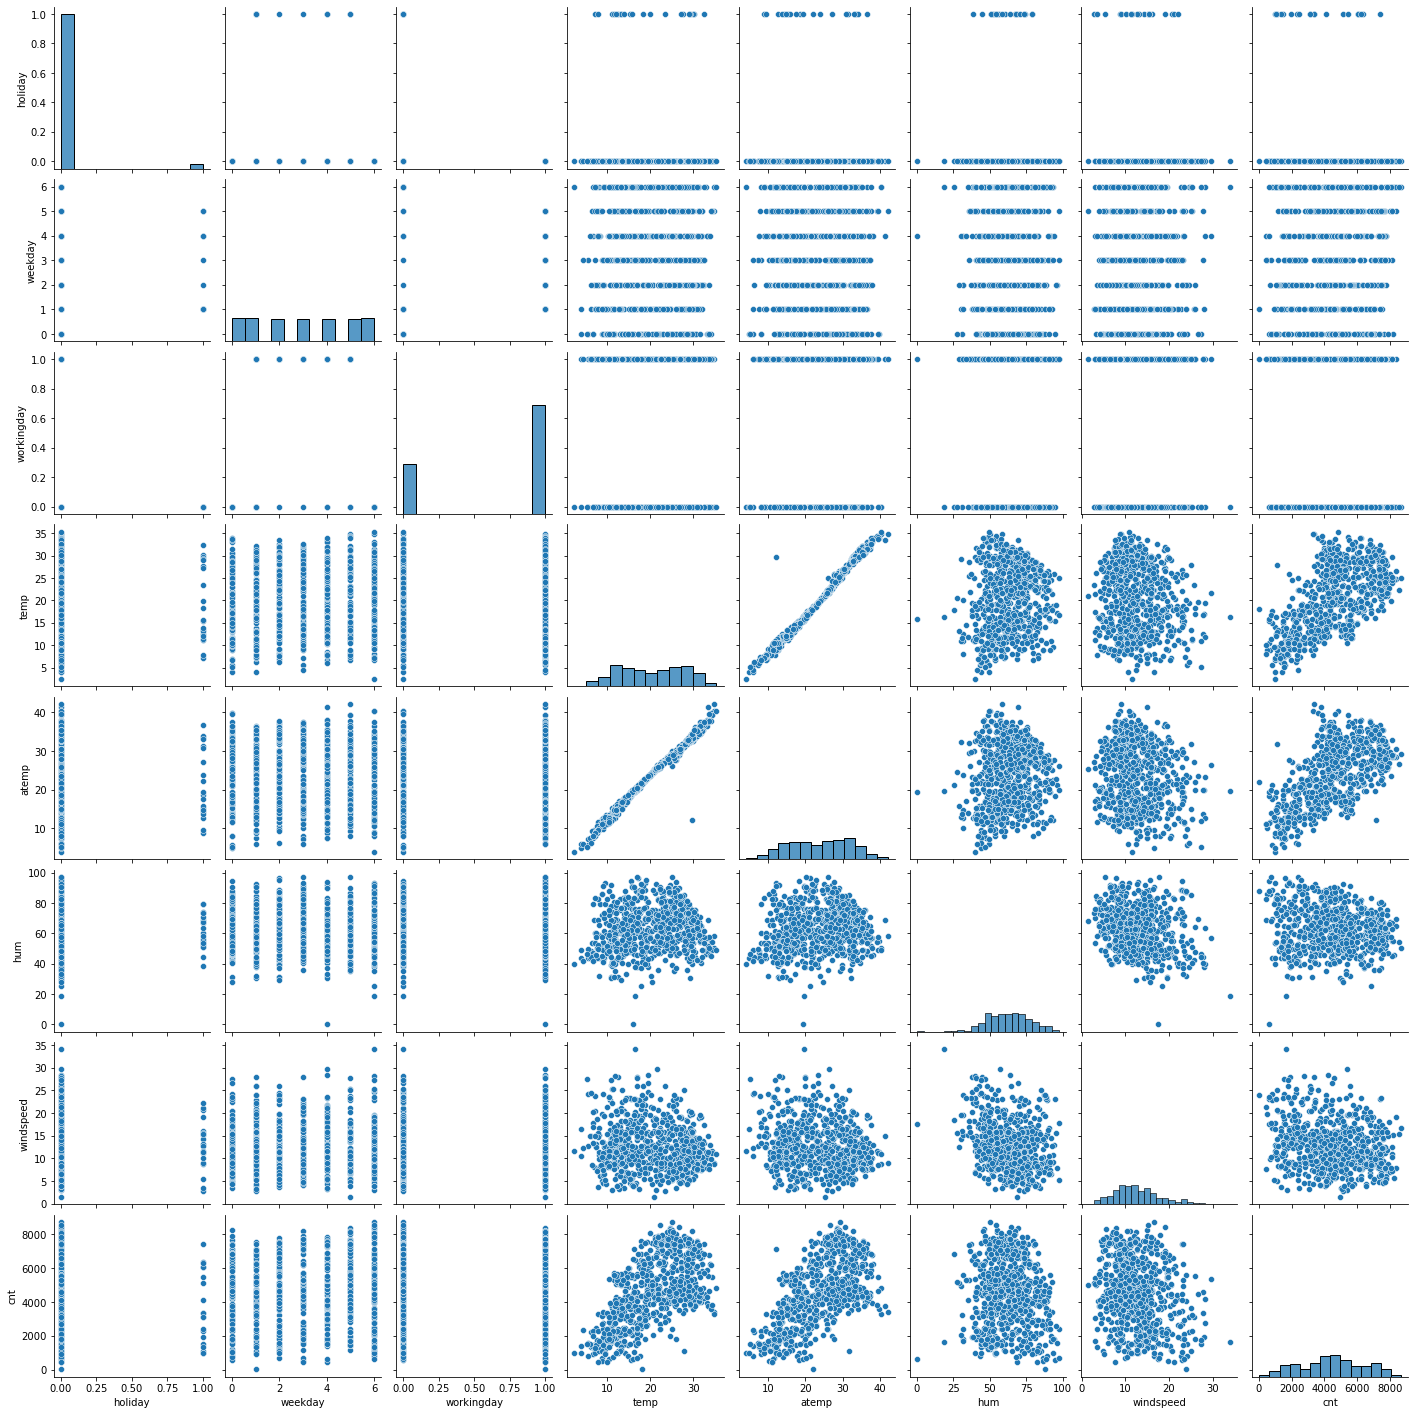

In [1021]:
#pairplot to observe linear relationship
sns.pairplot(bikesharing_dataframe)

count is having linear relationship with temp and atemp variables

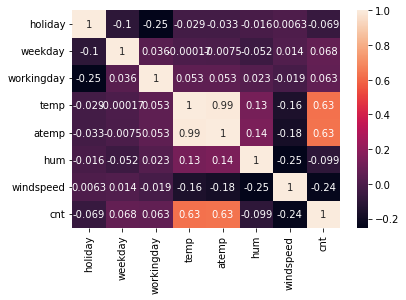

In [1022]:
#heatmap to find correlation among all variables
sns.heatmap(bikesharing_dataframe.corr(), annot = True)
plt.show()

we see positivie and high correlation between atemp and temp with cnt, 

In [940]:
#now prepare data for linear regression using dummy variables 
seasons_dummy = pd.get_dummies(bikesharing_dataframe.season,drop_first=True)
months_dummy = pd.get_dummies(bikesharing_dataframe.mnth,drop_first=True)
weekdays_dummy = pd.get_dummies(bikesharing_dataframe.weekday,drop_first=True)
weathersituation_dummy = pd.get_dummies(bikesharing_dataframe.weathersit,drop_first=True)

In [1023]:
#combine dummy variables values to original dataframe
bikesharing_dataframe_dummy = pd.concat([bikesharing_dataframe,months_dummy,weekdays_dummy,weathersituation_dummy],axis=1)
bikesharing_dataframe_dummy.head()
#drop original columns since we already have dummy columns created out of it
bikesharing_dataframe_dummy.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [1024]:
bikesharing_dataframe_dummy['yr'] = bikesharing_dataframe_dummy['yr'].astype(str).astype(int)
bikesharing_dataframe_dummy.info()
bikesharing_dataframe_dummy.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int32  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   August      730 non-null    uint8  
 9   December    730 non-null    uint8  
 10  February    730 non-null    uint8  
 11  January     730 non-null    uint8  
 12  July        730 non-null    uint8  
 13  June        730 non-null    uint8  
 14  March       730 non-null    uint8  
 15  May         730 non-null    uint8  
 16  November    730 non-null    uint8  
 17  October     730 non-null    uint8  
 18  September   730 non-null    uint8  
 19  Monday      730 non-null    u

(730, 27)

<AxesSubplot:>

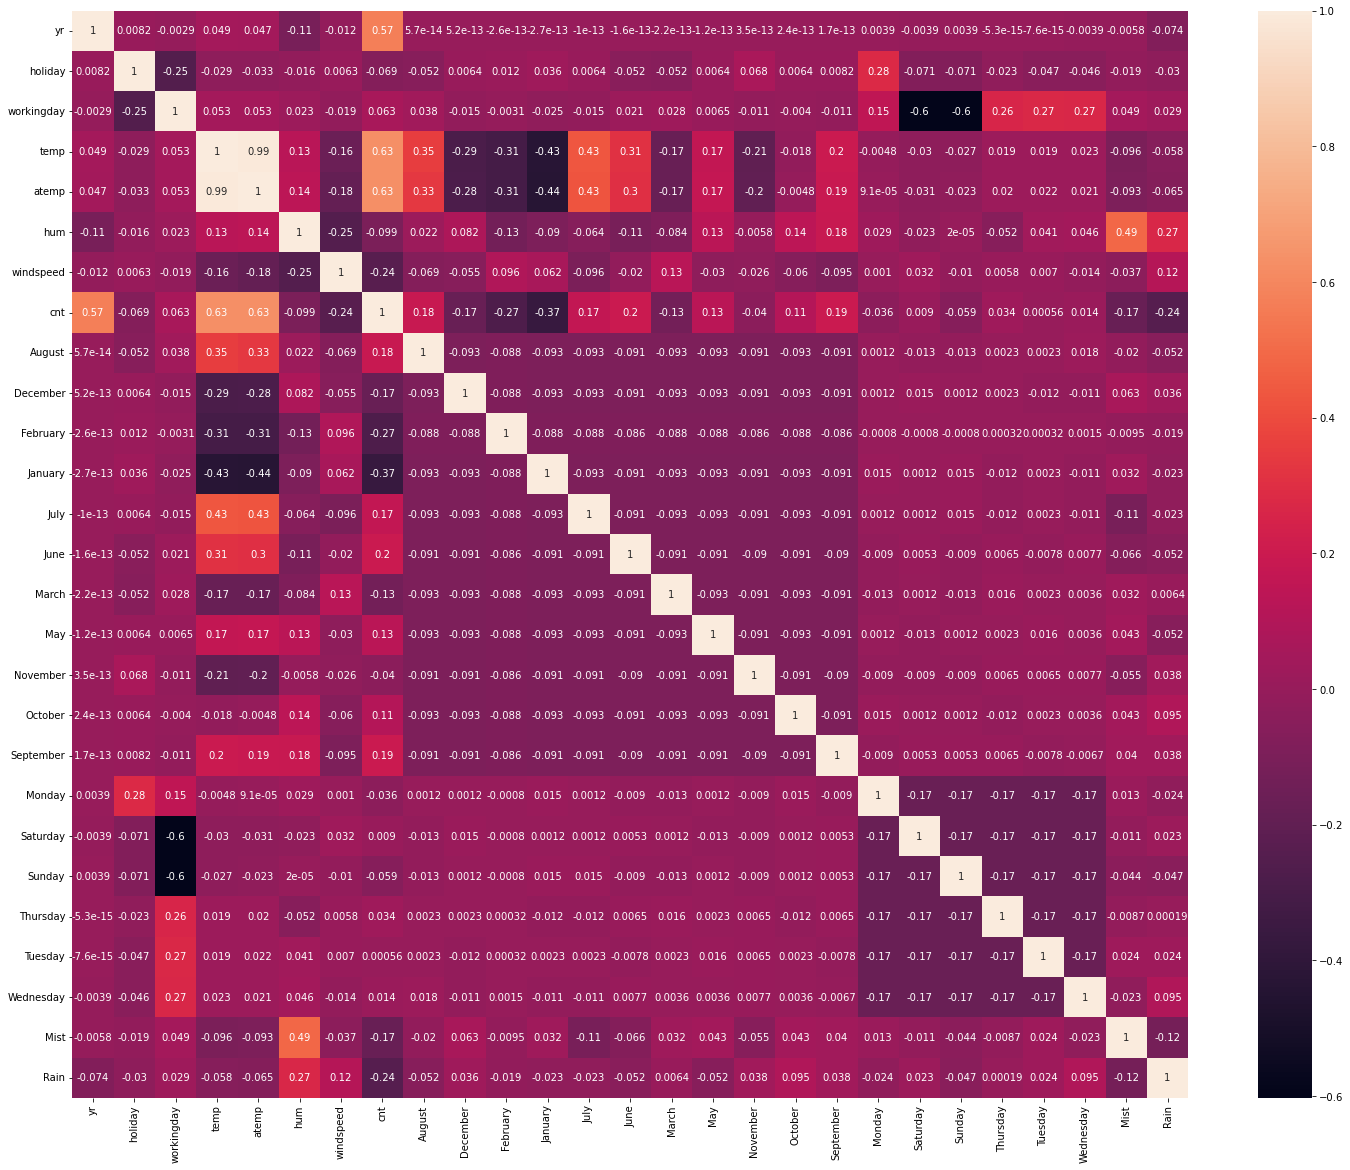

In [1025]:
#heatmap to show correlation among new dataset variables
plt.figure(figsize = (25,20))
sns.heatmap(bikesharing_dataframe_dummy.corr(),annot=True)

In [1026]:
#now let's split the dataset for train and test data in 70:30 which is commonly used ratio
#import required libraries
from sklearn.model_selection import train_test_split

train_dataframe,test_dataframe = train_test_split(bikesharing_dataframe_dummy,train_size=0.7,test_size=0.3,random_state=100)

In [1027]:
train_dataframe.shape

(510, 27)

In [1028]:
test_dataframe.shape

(219, 27)

now train and test data is ready, they are broken down into good amounts for model building

In [1029]:
#now the step is to scale the continuous/numerical variables to bring them to same scale since they are of different ranges

In [1030]:
#temp,atemp,windspeed,humidity,cnt

In [1031]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()

In [1032]:
train_dataframe.head() #observe the actual numeric variables for these values

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,August,December,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Rain
653,2019,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,2019,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,2019,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,1,0,0,0,0,1,0
728,2019,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,1,0,0,0,0,0
482,2019,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,1,0,0,0,0,1,0


In [1033]:
#put them in a variable
numericals = ['temp','atemp','hum','windspeed','cnt']

In [1034]:
#scale them

import warnings
warnings.filterwarnings('ignore')

train_dataframe[numericals] = scaling.fit_transform(train_dataframe[numericals])

In [1035]:
train_dataframe.head()
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int32  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    float64
 8   August      510 non-null    uint8  
 9   December    510 non-null    uint8  
 10  February    510 non-null    uint8  
 11  January     510 non-null    uint8  
 12  July        510 non-null    uint8  
 13  June        510 non-null    uint8  
 14  March       510 non-null    uint8  
 15  May         510 non-null    uint8  
 16  November    510 non-null    uint8  
 17  October     510 non-null    uint8  
 18  September   510 non-null    uint8  
 19  Monday      510 non-null    

temp,atemp,windspeed,humidity are perfectly scaled 

In [958]:
#define target variable and other feature varaibles 
y_train = train_dataframe.pop('cnt')
X_train = train_dataframe

Using recursive feature elimination (RFE) 
the goal of (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [1036]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

recursive_feature_elimination = RFE(linear_regression, 15)
recursive_feature_elimination = recursive_feature_elimination.fit(X_train, y_train)


#columns pulled by RFE and their ranking
list(zip(X_train.columns,recursive_feature_elimination.ranking_))

[('yr', 1),
 ('holiday', 1),
 ('workingday', 1),
 ('temp', 1),
 ('atemp', 1),
 ('hum', 1),
 ('windspeed', 1),
 ('August', 7),
 ('December', 6),
 ('February', 1),
 ('January', 1),
 ('July', 1),
 ('June', 8),
 ('March', 5),
 ('May', 4),
 ('November', 3),
 ('October', 1),
 ('September', 1),
 ('Monday', 10),
 ('Saturday', 1),
 ('Sunday', 1),
 ('Thursday', 11),
 ('Tuesday', 9),
 ('Wednesday', 12),
 ('Mist', 2),
 ('Rain', 1)]

In [1037]:
import statsmodels.api as sm

In [1038]:
X_train.columns[recursive_feature_elimination.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'February', 'January', 'July', 'October', 'September', 'Saturday',
       'Sunday', 'Rain'],
      dtype='object')

In [963]:
X_train_RFE = X_train[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'February', 'January', 'July', 'October', 'September', 'Saturday',
       'Sunday', 'Rain']]

In [1039]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#method to calculate VIF for each model building iteration
def calculateVIF(dataframe):
    vif = pd.DataFrame()
    vif['Features'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [1040]:
#1st linear regression model
X_train_statsmodel = sm.add_constant(X_train_RFE)
linear_model = sm.OLS(y_train,X_train_statsmodel).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     160.2
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.49e-173
Time:                        21:49:03   Log-Likelihood:                 474.67
No. Observations:                 510   AIC:                            -919.3
Df Residuals:                     495   BIC:                            -855.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -373.2090     14.051    -26.560      0.000    -400.817    -345.601
yr             0.2314      0.009     26.588      0.000       0.214       0.248
holiday      -93.3578      3.513    -26.577      0.000    -100.259     -86.456
workingday   -93.2736      3.513    -26.551      0.000    -100.176     -86.371
temp           0.3401      0.136      2.509      0.012       0.074       0.606
atemp          0.1445      0.145      0.995      0.320      -0.141       0.430
hum           -0.2493      0.033     -7.551      0.000      -0.314      -0.184
windspeed     -0.2201      0.028     -7.988      0.000      -0.274      -0.166
February      -0.1047      0.019     -5.532      0.000      -0.142      -0.067
January       -0.1374      0.018     -7.650      0.000      -0.173      -0.102
July          -0.0682      0.019     -3.685      0.000      -0.105      -0.032
October        0.0856      0.016      5.344      0.000       0.054       0.117
September      0.0732      0.017      4.374      0.000       0.040       0.106
Saturday     -93.2658      3.513    -26.551      0.000    -100.167     -86.364
Sunday       -93.3118      3.513    -26.562      0.000    -100.214     -86.410
Rain          -0.2075      0.027     -7.681      0.000      -0.261      -0.154
==============================================================================
Omnibus:                       58.328   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.242
Skew:                          -0.750   Prob(JB):                     9.33e-21
Kurtosis:                       4.445   Cond. No.                     1.59e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.21e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

drop atemp since it has high correlation value

In [1041]:
model1_X_train = X_train_RFE.drop(['atemp'],axis=1)

In [1043]:
#2nd linear model
X_train_statsmodel = sm.add_constant(model1_X_train)
linear_model = sm.OLS(y_train,X_train_statsmodel).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     172.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.82e-174
Time:                        21:50:08   Log-Likelihood:                 474.16
No. Observations:                 510   AIC:                            -920.3
Df Residuals:                     496   BIC:                            -861.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -373.1745     14.051    -26.558      0.000    -400.782    -345.567
yr             0.2313      0.009     26.586      0.000       0.214       0.248
holiday      -93.3499      3.513    -26.575      0.000    -100.251     -86.448
workingday   -93.2648      3.513    -26.548      0.000    -100.167     -86.363
temp           0.4723      0.027     17.683      0.000       0.420       0.525
hum           -0.2472      0.033     -7.503      0.000      -0.312      -0.183
windspeed     -0.2252      0.027     -8.314      0.000      -0.278      -0.172
February      -0.1055      0.019     -5.579      0.000      -0.143      -0.068
January       -0.1391      0.018     -7.773      0.000      -0.174      -0.104
July          -0.0681      0.019     -3.679      0.000      -0.105      -0.032
October        0.0867      0.016      5.430      0.000       0.055       0.118
September      0.0731      0.017      4.368      0.000       0.040       0.106
Saturday     -93.2570      3.513    -26.549      0.000    -100.158     -86.356
Sunday       -93.3029      3.513    -26.560      0.000    -100.205     -86.401
Rain          -0.2096      0.027     -7.783      0.000      -0.263      -0.157
==============================================================================
Omnibus:                       57.614   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.202
Skew:                          -0.742   Prob(JB):                     1.57e-20
Kurtosis:                       4.445   Cond. No.                     1.59e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.23e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1044]:
calculateVIF(model1_X_train)

,Features,VIF
2,workingday,11350404.61
11,Saturday,2598963.95
12,Sunday,2401669.13
1,holiday,427677.81
3,temp,1.98
7,January,1.40
8,July,1.32
4,hum,1.25
6,February,1.21
5,windspeed,1.15


working day column has very huge VIF value, from sources VIF can be infinite, which means the variable is perfectly correlated

In [970]:
#workingday column has high VIF, so dropping it
model2_X_train = model1_X_train.drop(['workingday'],axis=1)

In [1046]:
#3rd linear model
X_train_statsmodel = sm.add_constant(model2_X_train)
linear_model = sm.OLS(y_train,X_train_statsmodel).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     172.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.82e-174
Time:                        21:52:35   Log-Likelihood:                 474.16
No. Observations:                 510   AIC:                            -920.3
Df Residuals:                     496   BIC:                            -861.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.4393     17.564    -26.556      0.000    -500.949    -431.930
yr             0.2313      0.009     26.586      0.000       0.214       0.248
holiday       -0.0851      0.028     -3.092      0.002      -0.139      -0.031
temp           0.4723      0.027     17.683      0.000       0.420       0.525
hum           -0.2472      0.033     -7.503      0.000      -0.312      -0.183
windspeed     -0.2252      0.027     -8.314      0.000      -0.278      -0.172
February      -0.1055      0.019     -5.579      0.000      -0.143      -0.068
January       -0.1391      0.018     -7.773      0.000      -0.174      -0.104
July          -0.0681      0.019     -3.679      0.000      -0.105      -0.032
October        0.0867      0.016      5.430      0.000       0.055       0.118
September      0.0731      0.017      4.368      0.000       0.040       0.106
Saturday       0.0077      0.012      0.637      0.524      -0.016       0.032
Sunday        -0.0381      0.013     -3.039      0.003      -0.063      -0.013
Rain          -0.2096      0.027     -7.783      0.000      -0.263      -0.157
==============================================================================
Omnibus:                       57.614   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.202
Skew:                          -0.742   Prob(JB):                     1.57e-20
Kurtosis:                       4.445   Cond. No.                     8.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1047]:
calculateVIF(model2_X_train)

,Features,VIF
0,yr,45.19
3,hum,26.00
2,temp,12.96
4,windspeed,5.25
6,January,1.53
7,July,1.42
5,February,1.30
10,Saturday,1.24
9,September,1.22
11,Sunday,1.22


In [973]:
#Saturday column has high p-value, so dropping it
model3_X_train = model2_X_train.drop(['Saturday'],axis=1)

In [1048]:
#4th linear model
X_train_statsmodel = sm.add_constant(model3_X_train)
linear_model = sm.OLS(y_train,X_train_statsmodel).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     187.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.59e-175
Time:                        21:53:38   Log-Likelihood:                 473.95
No. Observations:                 510   AIC:                            -921.9
Df Residuals:                     497   BIC:                            -866.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -466.0794     17.545    -26.565      0.000    -500.550    -431.609
yr             0.2312      0.009     26.595      0.000       0.214       0.248
holiday       -0.0866      0.027     -3.160      0.002      -0.140      -0.033
temp           0.4715      0.027     17.684      0.000       0.419       0.524
hum           -0.2479      0.033     -7.532      0.000      -0.313      -0.183
windspeed     -0.2246      0.027     -8.302      0.000      -0.278      -0.171
February      -0.1060      0.019     -5.614      0.000      -0.143      -0.069
January       -0.1392      0.018     -7.783      0.000      -0.174      -0.104
July          -0.0678      0.019     -3.666      0.000      -0.104      -0.031
October        0.0869      0.016      5.443      0.000       0.056       0.118
September      0.0732      0.017      4.378      0.000       0.040       0.106
Sunday        -0.0395      0.012     -3.209      0.001      -0.064      -0.015
Rain          -0.2095      0.027     -7.782      0.000      -0.262      -0.157
==============================================================================
Omnibus:                       55.405   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.035
Skew:                          -0.717   Prob(JB):                     7.64e-20
Kurtosis:                       4.445   Cond. No.                     8.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1049]:
calculateVIF(model3_X_train)

,Features,VIF
0,yr,44.60
3,hum,25.98
2,temp,12.93
4,windspeed,5.25
6,January,1.53
7,July,1.42
5,February,1.29
9,September,1.22
8,October,1.20
10,Sunday,1.18


In [1050]:
#yr column has high p-value, so dropping it
model4_X_train = model3_X_train.drop(['yr'],axis=1)

In [1052]:
#5th linear model
X_train_statsmodel = sm.add_constant(model4_X_train)
linear_model = sm.OLS(y_train,X_train_statsmodel).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     57.78
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.03e-81
Time:                        21:54:30   Log-Likelihood:                 248.26
No. Observations:                 510   AIC:                            -472.5
Df Residuals:                     498   BIC:                            -421.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5228      0.045     11.747      0.000       0.435       0.610
holiday       -0.0953      0.043     -2.236      0.026      -0.179      -0.012
temp           0.5630      0.041     13.693      0.000       0.482       0.644
hum           -0.3287      0.051     -6.449      0.000      -0.429      -0.229
windspeed     -0.2259      0.042     -5.370      0.000      -0.309      -0.143
February      -0.0966      0.029     -3.293      0.001      -0.154      -0.039
January       -0.1166      0.028     -4.198      0.000      -0.171      -0.062
July          -0.0927      0.029     -3.224      0.001      -0.149      -0.036
October        0.0892      0.025      3.591      0.000       0.040       0.138
September      0.0667      0.026      2.565      0.011       0.016       0.118
Sunday        -0.0387      0.019     -2.021      0.044      -0.076      -0.001
Rain          -0.2280      0.042     -5.449      0.000      -0.310      -0.146
==============================================================================
Omnibus:                       47.895   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.423
Skew:                           0.075   Prob(JB):                     0.000448
Kurtosis:                       2.161   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1053]:
calculateVIF(model4_X_train)

,Features,VIF
2,hum,11.11
1,temp,10.23
3,windspeed,3.68
6,July,1.42
5,January,1.37
8,September,1.22
4,February,1.21
7,October,1.20
9,Sunday,1.18
10,Rain,1.13


In [979]:
#humidity column has high p-value, so dropping it
model5_X_train = model4_X_train.drop(['hum'],axis=1)

In [1054]:
#5th linear model
X_train_statsmodel = sm.add_constant(model5_X_train)
linear_model = sm.OLS(y_train,X_train_statsmodel).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     54.93
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           4.69e-74
Time:                        21:54:53   Log-Likelihood:                 227.81
No. Observations:                 510   AIC:                            -433.6
Df Residuals:                     499   BIC:                            -387.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3057      0.030     10.100      0.000       0.246       0.365
holiday       -0.0914      0.044     -2.062      0.040      -0.178      -0.004
temp           0.5326      0.042     12.540      0.000       0.449       0.616
windspeed     -0.1542      0.042     -3.656      0.000      -0.237      -0.071
February      -0.0879      0.030     -2.883      0.004      -0.148      -0.028
January       -0.1187      0.029     -4.110      0.000      -0.175      -0.062
July          -0.0711      0.030     -2.395      0.017      -0.129      -0.013
October        0.0697      0.026      2.719      0.007       0.019       0.120
September      0.0521      0.027      1.935      0.054      -0.001       0.105
Sunday        -0.0421      0.020     -2.116      0.035      -0.081      -0.003
Rain          -0.2996      0.042     -7.141      0.000      -0.382      -0.217
==============================================================================
Omnibus:                       38.663   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.801
Skew:                           0.075   Prob(JB):                      0.00101
Kurtosis:                       2.208   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [981]:
calculateVIF(model5_X_train)

,Features,VIF
1,temp,3.83
2,windspeed,3.40
5,July,1.32
7,September,1.21
8,Sunday,1.17
3,February,1.15
6,October,1.15
4,January,1.13
9,Rain,1.08
0,holiday,1.04


In [982]:
#September column has p-value >0.05,drop it
model6_X_train = model5_X_train.drop(['September'],axis=1)

In [1055]:
#6th linear model
X_train_statsmodel = sm.add_constant(model6_X_train)
linear_model = sm.OLS(y_train,X_train_statsmodel).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     60.29
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           3.69e-74
Time:                        21:55:14   Log-Likelihood:                 225.90
No. Observations:                 510   AIC:                            -431.8
Df Residuals:                     500   BIC:                            -389.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3041      0.030     10.024      0.000       0.245       0.364
holiday       -0.0864      0.044     -1.949      0.052      -0.174       0.001
temp           0.5503      0.042     13.232      0.000       0.469       0.632
windspeed     -0.1622      0.042     -3.852      0.000      -0.245      -0.079
February      -0.0886      0.031     -2.897      0.004      -0.149      -0.028
January       -0.1185      0.029     -4.091      0.000      -0.175      -0.062
July          -0.0827      0.029     -2.836      0.005      -0.140      -0.025
October        0.0638      0.026      2.500      0.013       0.014       0.114
Sunday        -0.0427      0.020     -2.140      0.033      -0.082      -0.003
Rain          -0.2937      0.042     -7.000      0.000      -0.376      -0.211
==============================================================================
Omnibus:                       26.586   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.687
Skew:                           0.114   Prob(JB):                      0.00290
Kurtosis:                       2.295   Cond. No.                         9.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1056]:
calculateVIF(model6_X_train)

,Features,VIF
1,temp,3.35
2,windspeed,3.34
5,July,1.27
7,Sunday,1.17
3,February,1.15
6,October,1.14
4,January,1.13
8,Rain,1.07
0,holiday,1.04


In [985]:
#September column has p-value >0.05,drop it
model7_X_train = model6_X_train.drop(['holiday'],axis=1)

In [1057]:
#7th linear model
X_train_statsmodel = sm.add_constant(model7_X_train)
linear_model = sm.OLS(y_train,X_train_statsmodel).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     66.98
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           2.82e-74
Time:                        21:55:41   Log-Likelihood:                 223.97
No. Observations:                 510   AIC:                            -429.9
Df Residuals:                     501   BIC:                            -391.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3007      0.030      9.901      0.000       0.241       0.360
temp           0.5523      0.042     13.247      0.000       0.470       0.634
windspeed     -0.1626      0.042     -3.852      0.000      -0.246      -0.080
February      -0.0912      0.031     -2.978      0.003      -0.151      -0.031
January       -0.1195      0.029     -4.118      0.000      -0.177      -0.063
July          -0.0814      0.029     -2.786      0.006      -0.139      -0.024
October        0.0635      0.026      2.480      0.013       0.013       0.114
Sunday        -0.0401      0.020     -2.005      0.045      -0.079      -0.001
Rain          -0.2911      0.042     -6.922      0.000      -0.374      -0.208
==============================================================================
Omnibus:                       24.924   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.206
Skew:                           0.110   Prob(JB):                      0.00369
Kurtosis:                       2.308   Cond. No.                         9.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1059]:
#Sunday has comparatively high p-value, so dropping it
model8_X_train = model7_X_train.drop(['Sunday'],axis=1)

#8th linear model
X_train_statsmodel = sm.add_constant(model8_X_train)
linear_model = sm.OLS(y_train,X_train_statsmodel).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     75.52
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           2.26e-74
Time:                        21:56:14   Log-Likelihood:                 221.93
No. Observations:                 510   AIC:                            -427.9
Df Residuals:                     502   BIC:                            -394.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2940      0.030      9.710      0.000       0.234       0.353
temp           0.5548      0.042     13.274      0.000       0.473       0.637
windspeed     -0.1625      0.042     -3.837      0.000      -0.246      -0.079
February      -0.0924      0.031     -3.009      0.003      -0.153      -0.032
January       -0.1187      0.029     -4.077      0.000      -0.176      -0.062
July          -0.0842      0.029     -2.875      0.004      -0.142      -0.027
October        0.0602      0.026      2.350      0.019       0.010       0.110
Rain          -0.2870      0.042     -6.811      0.000      -0.370      -0.204
==============================================================================
Omnibus:                       26.648   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.011
Skew:                           0.134   Prob(JB):                      0.00246
Kurtosis:                       2.298   Cond. No.                         9.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1061]:
calculateVIF(model8_X_train)

,Features,VIF
1,windspeed,3.31
0,temp,3.29
4,July,1.27
2,February,1.14
3,January,1.13
5,October,1.13
6,Rain,1.07


though windspeed and temperature are having >3 VIF, will consider them due to business impact of these variables

p-values are good and VIFs are also good within range, so we will fix the model8 for our analysis as better fit

In [1063]:
#residual analysis
y_train_pred = linear_model.predict(X_train_statsmodel)

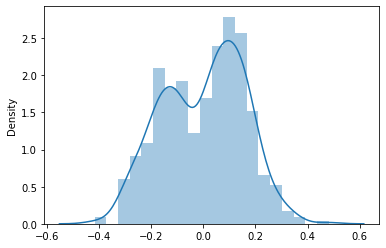

In [1073]:
#plot for residuals
residual = y_train_pred-y_train
sns.distplot(residual,bins = 20)
plt.show()

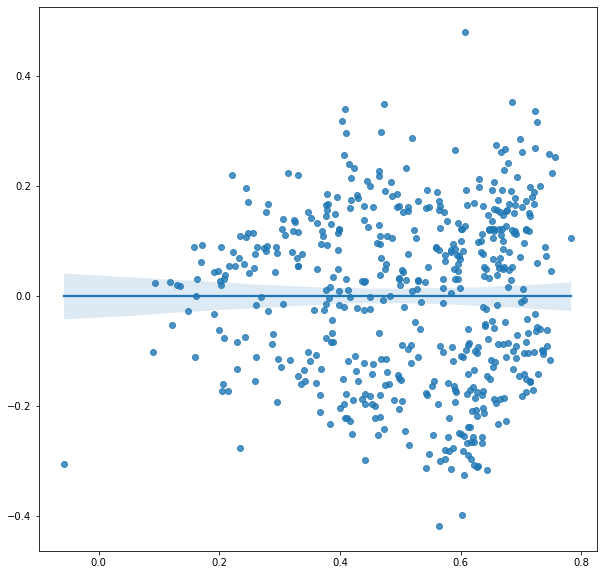

In [1074]:
#to analyse error terms being independent
plt.figure(figsize = (10,10))
sns.regplot(x=y_train_pred, y=residual)
plt.show()

from the above graph, there is no relation between predicted values and residuals, we can says error terms are independent.

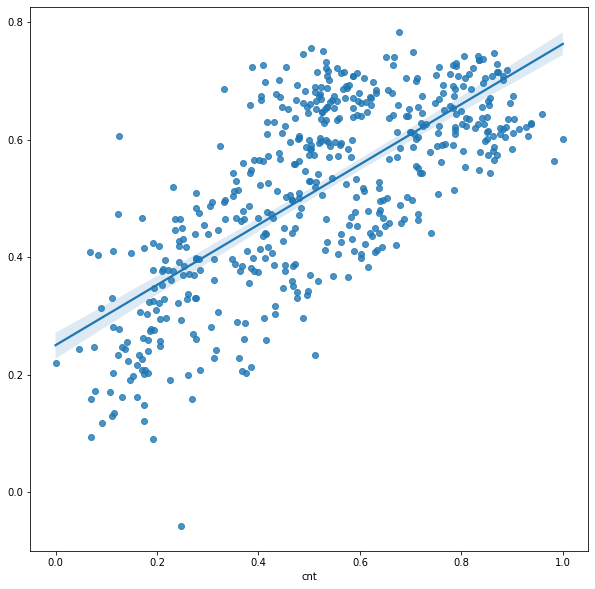

In [1081]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_train, y=y_train_pred)
plt.show()

from the above plot we see that there is equal variance across actual and predicted values
There is also a linear relationship between predicted and actual values

From the previous steps lower VIF values means lower correlation which is also be a good indicator that our model is a good fit.

In [1093]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_train_pred)
print(r2)

0.5129102982345071


Company can focus on the independent variablese of windspeed, temp, July, February, January, October,Rain for analysing and improving business of bike sharing